<a href="https://colab.research.google.com/github/Grey-matter2020/Machine-Learning/blob/main/Notebook/Visualization/MNIST_Dataset_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Connect to the Google Drive to read the iris.csv file
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [50]:
#Listing down files in the gdrive folder
!ls "/content/gdrive/"

MyDrive


In [52]:
#List the folder in the g drive
!ls "/content/gdrive/MyDrive/"

'Machine Learning'


In [4]:
#List the files in the Visualization folder
!ls "/content/gdrive/My Drive/Machine Learning/Visualization"

'Exploratory Data Analysis - Haberman Dataset-Matplotlib & Seaborn.ipynb'
'Exploratory Data Analysis - Iris Dataset - Matplotlib & Seaborn.ipynb'
 haberman.csv
 iris.csv
'MNIST Dataset-PCA.ipynb'
 mnist_train.csv


In [5]:
#Changing the directory to Visualization
%cd "/content/gdrive/My Drive/Machine Learning/Visualization"

/content/gdrive/My Drive/Machine Learning/Visualization


In [6]:
#Understand the present current working directory
!pwd

/content/gdrive/My Drive/Machine Learning/Visualization


In [7]:
# Listing down files in the Visualization folder
!ls

'Exploratory Data Analysis - Haberman Dataset-Matplotlib & Seaborn.ipynb'
'Exploratory Data Analysis - Iris Dataset - Matplotlib & Seaborn.ipynb'
 haberman.csv
 iris.csv
'MNIST Dataset-PCA.ipynb'
 mnist_train.csv


In [8]:
#MNIST dataset downloaded from Kaggle
#https://www.kaggle.com/ngbolin/mnist-dataset-digit-recognizer/data
#Functions to read and show images

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()

In [11]:
d0=pd.read_csv("mnist_train.csv")

print (d0.head()) #print first 5 lines of the dataset

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [12]:
l=d0['label']

In [13]:
d=d0.drop('label',axis=1)

In [14]:
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
print (d.shape)
print (l.shape)

(42000, 784)
(42000,)


In [16]:
d.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [17]:
idx=100
len(d.iloc[idx])

784

In [53]:
d.iloc[idx].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [18]:
grid_data=d.iloc[idx].values.reshape(28,28)

In [19]:
type(grid_data)

numpy.ndarray

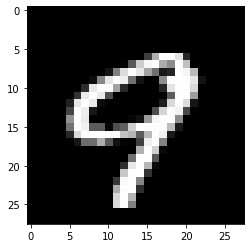

In [20]:
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()

In [21]:
l.iloc[idx]

9

In [22]:
data=d.head(42000)
labels=l.head(42000)
print ("the size of the sample data is: " ,data.shape)

the size of the sample data is:  (42000, 784)


In [23]:
#Data preprocessing:Data standardization
#.Fit uses the data to caluclate the u and sigma for standardization
#.transform then transforms each data point using the u and sigma


from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


In [24]:
#Calculate the Co variance matrix
sample_data=standardized_data

#Matrix multiplication using Numpy
covar_matrix=np.matmul(sample_data.T,sample_data)

In [25]:
print("The size of the covariance matrix is :", covar_matrix.shape)

The size of the covariance matrix is : (784, 784)


In [26]:
#Finding the top two eigen values and vectors for projecting on a 2d space

from scipy.linalg import eigh

values,vectors=eigh(covar_matrix,eigvals=(782,783))
print(vectors.shape)
#vectors=vectors.T
print (vectors.shape)

(784, 2)
(784, 2)


In [27]:
print(sample_data.shape)
print(vectors.shape)

(42000, 784)
(784, 2)


In [28]:
new_coordinates=np.matmul(sample_data,vectors)
print(new_coordinates.shape)
print(type(new_coordinates))
print(labels.values.shape)
print(type(labels.values))

(42000, 2)
<class 'numpy.ndarray'>
(42000,)
<class 'numpy.ndarray'>


In [29]:
new_coordinates=np.append(new_coordinates,labels.values.reshape(42000,1),axis=1)

In [30]:
new_coordinates.shape

(42000, 3)

In [31]:
dataframe=pd.DataFrame(new_coordinates,columns=("2nd_principle","1st_principle","lables"))

In [32]:
dataframe.describe()

,2nd_principle,1st_principle,lables
count,4.200000e+04,4.200000e+04,42000.000000
mean,1.441387e-16,-3.397071e-16,4.456643
std,5.395504e+00,6.379379e+00,2.887730
min,-1.641626e+01,-9.340314e+00,0.000000
25%,-3.560878e+00,-4.715864e+00,2.000000
50%,-5.449932e-01,-1.391027e+00,4.000000
75%,3.294416e+00,3.165928e+00,7.000000
max,2.759884e+01,3.181781e+01,9.000000


In [33]:
import seaborn as sns

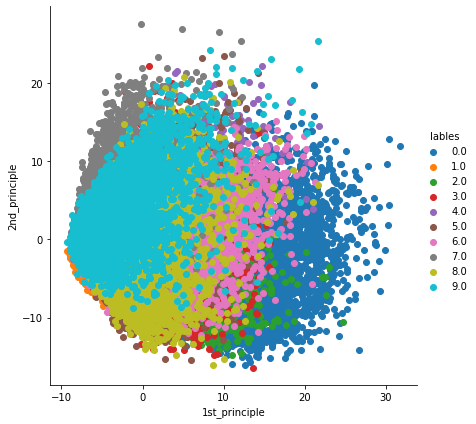

In [34]:
sns.FacetGrid(dataframe,hue="lables",height=6).map(plt.scatter,"1st_principle","2nd_principle").add_legend()
plt.show()


# All the above can be done using sklearn in just 1 line of code

In [35]:
#Data preprocessing:Data standardization
#.Fit uses the data to caluclate the u and sigma for standardization
#.transform then transforms each data point using the u and sigma

from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


In [36]:

sample_data=standardized_data

In [37]:
from sklearn import decomposition

In [38]:
pca=decomposition.PCA(n_components=2)

In [39]:
pca_data=pca.fit_transform(sample_data)

In [40]:
pca_data.shape

(42000, 2)

In [41]:
pca_data=np.append(pca_data,labels.values.reshape(42000,1),axis=1)

In [42]:
pca_data.shape

(42000, 3)

In [43]:
dataframe=pd.DataFrame(pca_data,columns=("1st_principle","2nd_principle","lables"))

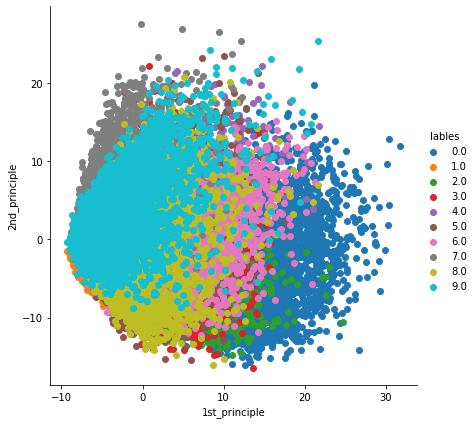

In [44]:
sns.FacetGrid(dataframe,hue="lables",height=6).map(plt.scatter,"1st_principle","2nd_principle").add_legend()
plt.show()
